###Standard Deviation and Distribution in Python

Topics Covered: Distribution, Standard Deviation, Z-Score

In [67]:
# Import relevant libraries, packages, and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #run python -m pip install -U matplotlib in command prompt if you have not already
import statsmodels.api as sm #same with python -m pip install statsmodels
from scipy import stats

In [21]:
#Import your data
movie_data = pd.read_csv("C:\\Users\\jmula\\Documents\\Jupyter Notebooks Python\\movies_dataset_example.csv")
#note if you're having issues make sure you have double slash for the pathway

In [22]:
#Explore data to understand
movie_data.head()

,Movie Title,Release Date,Wikipedia URL,Genre,Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget,Revenue
0,10 Cloverfield Lane,3/8/2016,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Thriller,Dan Trachtenberg,NaN,Mary Elizabeth Winstead,John Goodman,John Gallagher,NaN,NaN,15000000,108300000
1,13 Hours: The Secret Soldiers of Benghazi,1/15/2016,https://en.wikipedia.org/wiki/13_Hours:_The_Se...,Action,Michael Bay,NaN,James Badge Dale,John Krasinski,Toby Stephens,Pablo Schreiber,Max Martini,45000000,69400000
2,2 Guns,8/2/2013,https://en.wikipedia.org/wiki/2_Guns,Action,Baltasar Kormákur,NaN,Mark Wahlberg,Denzel Washington,Paula Patton,Bill Paxton,Edward James Olmos,61000000,131900000
3,21 Jump Street,3/16/2012,https://en.wikipedia.org/wiki/21_Jump_Street_(...,Comedy,Phil Lord,Chris Miller,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Rob Riggle,55000000,201500000
4,22 Jump Street,6/4/2014,https://en.wikipedia.org/wiki/22_Jump_Street,Action,Phil Lord,Chris Miller,Channing Tatum,Jonah Hill,Ice Cube,NaN,NaN,84500000,331300000


In [23]:
#same with using the shape
movie_data.shape #you should see 508, 13 which means 508 rows with 13 columns

(508, 13)

To be able to do the things we want to do we need to change the data into a dataframe

In [31]:
#Data into Dataframe 
movie_df = pd.DataFrame(movie_data, columns=["Movie Title","Release Date","Wikipedia URL","Genre","Director (1)","Director (2)","Cast (1)","Cast (2)","Cast (3)","Cast (4)", "Cast(5)", "Budget","Revenue"])

Now I edited the original data set within excel to already have integers, see the data cleaning walkthrough if you need a refresher to do it in python!

Now, we have two monetary values to look at for this data Budget and Revenue, since we're looking at probability lets see if these fit a specific type of probability distribution.

We can do this by running statistical tests to see if its a normal distribution.

In [ ]:
### Modeling Data for Probability Distribution

The first step in trying to model your data with a probability distribution is to plot a histogram. This will help you visualize the shape of your data, and determine if it resembles the shape of a specific distribution. 

Use matplotlib’s histogram function to plot a histogram of the revenue data

<Axes: >

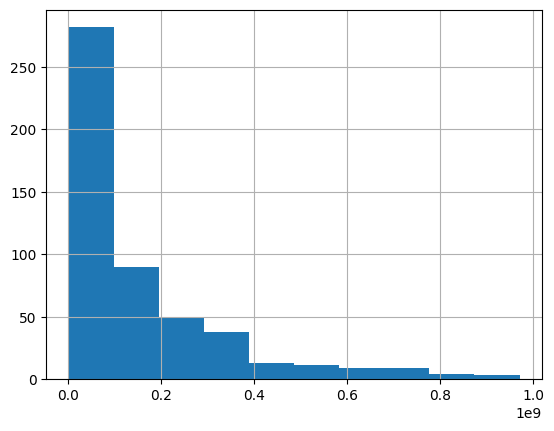

In [68]:
movie_df['Revenue'].hist()

Now we can see this histogram does not necessarily fit a bell curve or normal distribution and is skewed right (note skews go in the direction of the 'tail'), we can tell a majority of our data will be on the left

Note that while this is not a normal distribution for demonstration purposes for python we'll pretend that it is

In [ ]:
### Empirical rule for Standard Deviation
Recall that the **empirical rule** says that for a normal distribution:

*   **68%** of the values fall within +/- 1 SD from the mean
*   **95%** of the values fall within +/- 2 SD from the mean
*   **99.7%** of the values fall within +/- 3 SD from the mean

(**Note**: "SD" stands for standard deviation)

In [51]:
#finding mean
mean_revenue = movie_df["Revenue"].mean()
print(mean_revenue)

151983208.66141734


In [55]:
#finding standard deviation 
std_revenue = movie_df["Revenue"].std()
print(std_revenue)

183255470.09587172


In [59]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit_revenue_std_1 = mean_revenue - 1 * std_revenue
# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit_revenue_std_1 = mean_revenue + 1 * std_revenue
# Display lower_limit, upper_limit.
print(lower_limit_revenue_std_1, upper_limit_revenue_std_1)

-31272261.43445438 335238678.75728905


In [60]:
#Empirical Rule 1

#how to display the percentage of data that falls within 1 standard deviation of the mean
((movie_df["Revenue"] >= lower_limit_revenue_std_1) & (movie_df["Revenue"] <= upper_limit_revenue_std_1)).mean() * 100
#should show 85.43307086614173

85.43307086614173

So we can see that it strays a bit from the first rule, lets see what another standard deviation away says

In [61]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit_revenue_std_2 = mean_revenue - 2 * std_revenue
# Define variable for upper limit, 2 standard deviation above the mean.
upper_limit_revenue_std_2 = mean_revenue + 2 * std_revenue
# Display lower_limit, upper_limit.
print(lower_limit_revenue_std_2, upper_limit_revenue_std_2)

-214527731.5303261 518494148.85316074


In [63]:
#Empirical Rule 2

#how to display the percentage of data that falls within 1 standard deviation of the mean
((movie_df["Revenue"] >= lower_limit_revenue_std_2) & (movie_df["Revenue"] <= upper_limit_revenue_std_2)).mean() * 100
#should show 93.30708661417323

93.30708661417323

Now this doesn't follow the second empirical rule, but for the purposes of the next bit we'll say this looks close

### Z-Score
How can we identify potential outliers in our data?
Using the **z-score**

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

In [65]:
# Compute the z-score for every revenue value, and add a column named z_score in the data to store those results.
movie_df["z_score_revenue"] = stats.zscore(movie_df["Revenue"])

# Display the first 5 rows to ensure that the new column was added.
movie_df.head()

,Movie Title,Release Date,Wikipedia URL,Genre,Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast(5),Budget,Revenue,z_score_revenue
0,10 Cloverfield Lane,3/8/2016,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Thriller,Dan Trachtenberg,NaN,Mary Elizabeth Winstead,John Goodman,John Gallagher,NaN,NaN,NaN,108300000,-0.238608
1,13 Hours: The Secret Soldiers of Benghazi,1/15/2016,https://en.wikipedia.org/wiki/13_Hours:_The_Se...,Action,Michael Bay,NaN,James Badge Dale,John Krasinski,Toby Stephens,Pablo Schreiber,NaN,NaN,69400000,-0.451089
2,2 Guns,8/2/2013,https://en.wikipedia.org/wiki/2_Guns,Action,Baltasar Kormákur,NaN,Mark Wahlberg,Denzel Washington,Paula Patton,Bill Paxton,NaN,NaN,131900000,-0.109699
3,21 Jump Street,3/16/2012,https://en.wikipedia.org/wiki/21_Jump_Street_(...,Comedy,Phil Lord,Chris Miller,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,NaN,NaN,201500000,0.270473
4,22 Jump Street,6/4/2014,https://en.wikipedia.org/wiki/22_Jump_Street,Action,Phil Lord,Chris Miller,Channing Tatum,Jonah Hill,Ice Cube,NaN,NaN,NaN,331300000,0.979472


In [66]:
# Display data where `revenue` is above or below 3 standard deviations of the mean

movie_df[(movie_df["z_score_revenue"] > 3) | (movie_df["z_score_revenue"] < -3)]

,Movie Title,Release Date,Wikipedia URL,Genre,Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast(5),Budget,Revenue,z_score_revenue
35,Batman v Superman: Dawn of Justice,3/19/2016,https://en.wikipedia.org/wiki/Batman_v_Superma...,Action,Zack Snyder,NaN,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,NaN,NaN,872700000,3.936729
56,Captain America: The Winter Soldier,3/13/2014,https://en.wikipedia.org/wiki/Captain_America:...,Action,Anthony Russo,Joe Russo,Chris Evans,Scarlett Johansson,Sebastian Stan,Anthony Mackie,NaN,NaN,714400000,3.072057
77,Dawn of the Planet of the Apes,6/26/2014,https://en.wikipedia.org/wiki/Dawn_of_the_Plan...,Action,Matt Reeves,NaN,Andy Serkis,Gary Oldman,Jason Clarke,Kodi Smit-McPhee,NaN,NaN,710600000,3.051300
79,Deadpool,2/8/2016,https://en.wikipedia.org/wiki/Deadpool_(film),Action,Tim Miller,NaN,Ryan Reynolds,Gina Carano,T. J. Miller,Ed Skrein,NaN,NaN,782600000,3.444581
82,Despicable Me 2,6/20/2013,https://en.wikipedia.org/wiki/Despicable_Me_2,Comedy,Chris Renaud,Pierre Coffin,Steve Carell,Kristen Wiig,Miranda Cosgrove,Dana Gaier,NaN,NaN,970800000,4.472575
108,Fast & Furious 6,5/17/2013,https://en.wikipedia.org/wiki/Fast_%2526_Furio...,Action,Justin Lin,NaN,Vin Diesel,Dwayne Johnson,Paul Walker,Michelle Rodriguez,NaN,NaN,788700000,3.477901
148,Ice Age: Continental Drift,7/13/2012,https://en.wikipedia.org/wiki/Ice_Age:_Contine...,Adventure,Steve Martino,Mike Thurmeier,Ray Romano,John Leguizamo,Denis Leary,Queen Latifah,NaN,NaN,877000000,3.960217
191,Madagascar 3: Europe's Most Wanted,6/8/2012,https://en.wikipedia.org/wiki/Madagascar_3:_Eu...,Comedy,Eric Darnell,NaN,Noah Baumbach(screenplay); Ben Stiller,Chris Rock,David Schwimmer,Jada Pinkett Smith,NaN,NaN,746900000,3.249579
336,The Amazing Spider-Man,7/3/2012,https://en.wikipedia.org/wiki/The_Amazing_Spid...,Action,Marc Webb,NaN,Andrew Garfield,Emma Stone,Max Charles,Martin Sheen,NaN,NaN,757900000,3.309664
380,The Hobbit: The Battle of the Five Armies,12/1/2014,https://en.wikipedia.org/wiki/The_Hobbit:_The_...,Adventure,Peter Jackson,NaN,Ian McKellen,Martin Freeman,Richard Armitage,Evangeline Lilly,NaN,NaN,956000000,4.391734


Now this list involves all movies that have made revenue that is more than 3 standard deviations above the mean, meaning these movies did amazing at the box office.

Note on outliers:
    Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.